<a href="https://colab.research.google.com/github/MandilJThapa/Pricipal_component_Analysis/blob/master/Cat_Vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [99]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [100]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [101]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout
from keras import Sequential

In [102]:
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels = 'inferred',
    label_mode= 'int',
    image_size= (256,256),
    batch_size= 32

)
validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels = 'inferred',
    label_mode= 'int',
    image_size= (256,256),
    batch_size= 32

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [103]:
def process(image,label):
  image= tf.cast(image/255,tf.float32)
  return image,label
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [104]:
model= Sequential()

model.add(Conv2D(32, kernel_size= (3,3),padding= 'valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(64, kernel_size= (3,3),padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size= (3,3),padding= 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [116]:
from tensorflow.keras.callbacks import EarlyStopping
callback= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0

)

In [117]:
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [118]:
history= model.fit(train_ds, epochs= 10, validation_data= validation_ds, callbacks= callback)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 0.3630 - accuracy: 0.8414 - val_loss: 0.4286 - val_accuracy: 0.8150
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2665 - accuracy: 0.8899 - val_loss: 0.4960 - val_accuracy: 0.7670
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.1642 - accuracy: 0.9333 - val_loss: 1.2478 - val_accuracy: 0.6976
Epoch 3: early stopping


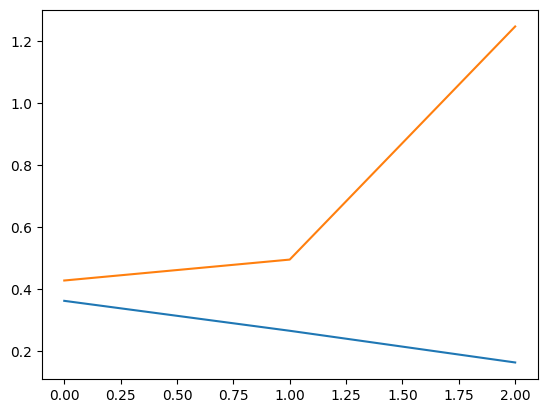

In [119]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [120]:
import cv2

In [133]:
test_img= cv2.imread('/content/dog1.jpg')

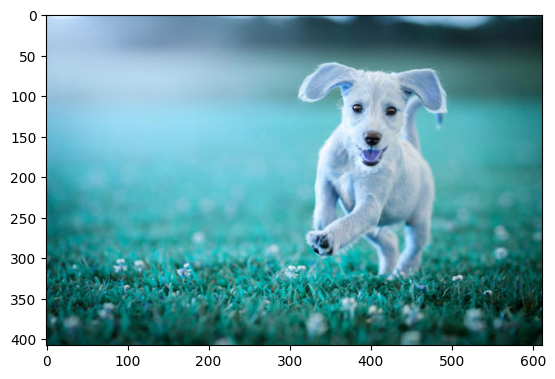

In [134]:
plt.imshow(test_img)

In [135]:
test_img.shape

(408, 612, 3)

In [136]:
test_img= cv2.resize(test_img, (256,256))

In [137]:
test_input= test_img.reshape(1,256,256,3)

In [138]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)